FOURIER TRANSFORM approach 

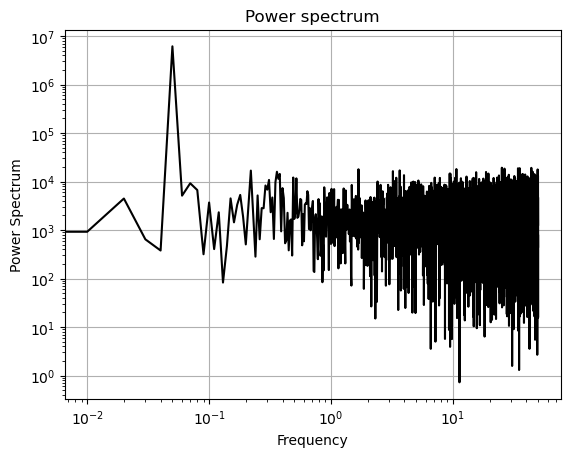

In [2]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0, 100, 10000) 

amplitude = 0.5
period = 20  
noise_level = 0.5
noise = np.random.normal(loc=0, scale=noise_level, size=len(time))

flux = amplitude * np.sin(2 * np.pi * time / period) + noise

# Applying Fourier Transform
fourier_transform = np.fft.fft(flux)
power_spectrum = np.abs(fourier_transform) ** 2
sampling_period = time[1] - time[0]
frequencies = np.fft.fftfreq(len(time), d=sampling_period)

# Keeping only positive frequencies
positive_freq_mask = frequencies >= 0
frequencies = frequencies[positive_freq_mask]
power_spectrum = power_spectrum[positive_freq_mask]

#Plotting the Power spectrum
plt.loglog(frequencies, power_spectrum, '-', color='k')
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum")
plt.title("Power spectrum")
plt.grid()
plt.show()





STRUCTURE FUNCTION approach

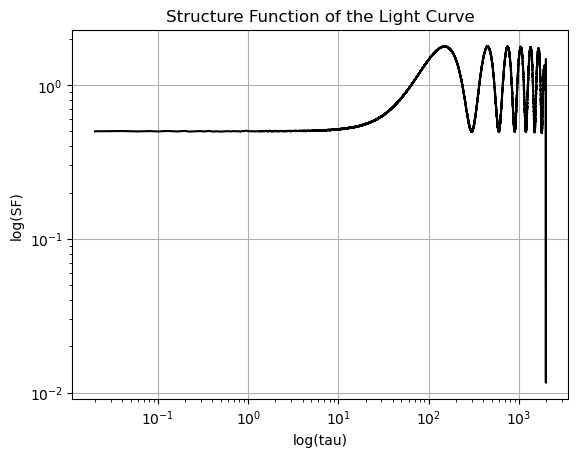

In [3]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0, 2000, 100000)  

period = 300
noise_level = 0.5

noise = np.random.normal(loc=0, scale=noise_level, size=len(time))

flux = 0.8 * np.sin(2 * np.pi * time / period) + noise

# Computing the structure function
structure_function = []

for tau in range(1, len(time)):
    sf_tau = np.mean((flux[:-tau] - flux[tau:]) ** 2)
    structure_function.append(sf_tau)

# Plotting the structure function
plt.loglog(time[1:], structure_function, '-', color='k')
plt.xlabel("log(tau)")
plt.ylabel("log(SF)")
plt.title("Structure Function of the Light Curve")
plt.grid()
plt.show()



LOMB SCARGLE PERIODOGRAM approach

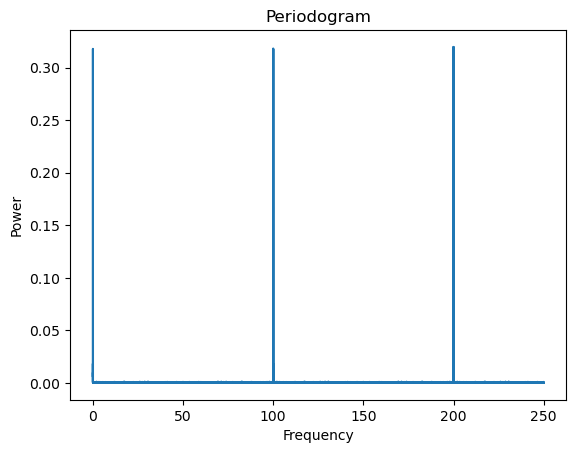

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import LombScargle

time = np.linspace(0, 100, 10000) 

amplitude = 0.5
period = 20  
noise_level = 0.5
noise = np.random.normal(loc=0, scale=noise_level, size=len(time))

flux = amplitude * np.sin(2 * np.pi * time / period) + noise

# Calculate the Lomb-Scargle periodogram
frequency, power = LombScargle(time, flux).autopower()

plt.plot(frequency, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title("Periodogram")
plt.show()